In [1]:
import subprocess
import os
import sys
os.system("sh experiments.sh")

1

In [35]:
import random
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic, WhiteKernel, ConstantKernel, Product, Sum,\
                                            Exponentiation, DotProduct,Matern
from pykrige.rk import RegressionKriging

In [3]:
seed = 7
np.random.seed(seed)

locations_cordinates = np.random.uniform(0,20, size = (10,2))


s1_plus_s2 = np.sum(locations_cordinates,axis = 1)
s1_plus_s2 = np.reshape(s1_plus_s2,(10,1))

X_A1 =  s1_plus_s2+np.random.normal(size=(10,100))
print(np.shape(X_A1))

(10, 100)


In [4]:
kernel = 1*RBF()
gpr = GaussianProcessRegressor(kernel = kernel, random_state = seed)
gpr.fit(locations_cordinates,X_A1)

print(f"Kernel parameters before fit:\n{kernel})")
print(
    f"Kernel parameters after fit: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
)

Kernel parameters before fit:
1**2 * RBF(length_scale=1))
Kernel parameters after fit: 
17.3**2 * RBF(length_scale=8.68) 
Log-likelihood: -3354.357


In [5]:
def f(x,y,t):
    Z = np.zeros((x.shape[0],x.shape[0]))
    for i in range(x.shape[0]):
        mean, std = gpr.predict(np.column_stack((X[i],Y[i])), return_std = True)
        y = np.random.normal(loc = mean[:,t-1], scale = std)
        Z[i] = y;
    return Z

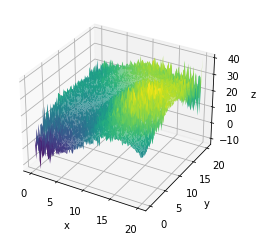

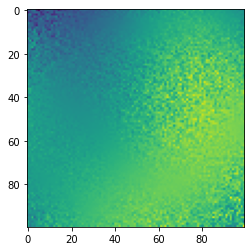

In [11]:
fig = plt.figure()

x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)

X, Y = np.meshgrid(x, y)


Z = f(x,y,1)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

fig = plt.figure()
plt.imshow(Z)
plt.show()


In [29]:
loc_3 = np.random.uniform(0,20, size = (20,2))

mean,std = gpr.predict(loc_3,return_std=True)
std = std.reshape((std.shape[0],1))
y = np.random.normal(loc = mean,scale = std)
print(y.shape)
from pykrige.uk import UniversalKriging

x_d = np.ones((loc_3.shape[0],100))*(loc_3[:,0].reshape(loc_3.shape[0],1))
x_d = x_d.flatten('F')
y_d = np.ones((loc_3.shape[0],100))*(loc_3[:,1].reshape(loc_3.shape[0],1))
y_d = y_d.flatten('F')

val = y.flatten('F')
print(x_d.shape)
print(y_d.shape)
print(val.shape)
krig = UniversalKriging(x_d,y_d,val,variogram_model="gaussian")





(20, 100)
(2000,)
(2000,)
(2000,)


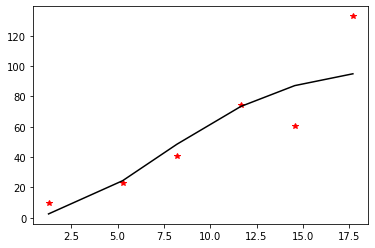

In [18]:
krig.display_variogram_model()

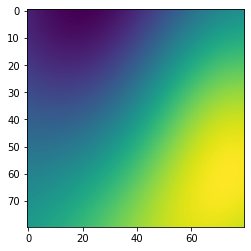

In [12]:
gridx = np.arange(0.0, 20, 0.25)
gridy = np.arange(0.0, 20, 0.25)

z, ss = krig.execute("grid", gridx, gridy)
plt.imshow(z)
plt.show()

In [37]:
location_points = np.random.uniform(0,20, size = (15,2))
ke,ks = krig.execute("points",location_points[:,0],location_points[:,1])
print(ke)

ge = gpr.predict(location_points)
print(ge[:,0])

print(r2_score(ge[:,0],ke))

[25.673465722179632 13.584858609868029 27.40621592283082
 20.853023748634506 23.4387725700329 28.041070652445235 21.489407760960752
 22.737974535714965 17.57223514644262 24.268283348162385
 13.499529947698763 13.065703052062732 18.253362506937993
 24.382588468327295 18.763666491564795]
[27.84220377 14.58526134 27.56318848 22.24658815 23.67611158 27.64127041
 20.56037069 26.14751809 17.36975228 28.4122812  16.68512612 14.96600124
 17.07287108 27.54906173 18.70035178]
0.8348953362485266


In [9]:
time_points = np.random.randint(1,101,size=5)
location_points = np.random.uniform(0,20, size = (5,2))

features = []
for x,y in location_points:
    for t in time_points:
        features.append([x,y,t])
        
features = np.array(features)

In [10]:
X_A2 = np.sum(features[:,:-1],axis = 1)
X_A2 = X_A2 + 0.5* features[:,-1] + np.random.normal(size=X_A2.shape[0])

In [11]:
kernel_s = 1*RBF()
kernel_t = 0.5*RBF()
gpr = GaussianProcessRegressor(kernel = kernel_s*kernel_t, random_state = seed)
gpr.fit(features,X_A2)

print(f"Kernel parameters before fit:\n{kernel})")
print(
    f"Kernel parameters after fit: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
)

Kernel parameters before fit:
1**2 * RBF(length_scale=1))
Kernel parameters after fit: 
1**2 * RBF(length_scale=1) * 0.707**2 * RBF(length_scale=1) 
Log-likelihood: -47445.439
